#### Importing the relevant libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import metrics

import statsmodels.api as sm

from math import log

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#### Reading the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking the shape of the dataframe

df.shape

(1460, 81)

#### Dataframe Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Checking for the Missing Values

In [5]:
# Checking the percentage of missing values

round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [6]:
# Dropping the 3 columns where the missing value percentage is greater than 90

max_null_percentage = 90
df = df.loc[:, ((df.isnull().sum() * 100 / len(df)) < max_null_percentage)]
df.shape

(1460, 78)

#### Imputing the null values for rest of the columns since those do not represent actual nulls in true sense

In [7]:
# Nulls in the 'Fence' column inidcates 'No Fence'

df['Fence'].fillna('No Fence',inplace = True)

In [8]:
# Nulls in the 'FireplaceQu' column indicates 'No Fireplace'

df['FireplaceQu'].fillna('No Fireplace',inplace = True)

In [9]:
# Replacing nulls in LotFrontage with 0 (no frontage)

df['LotFrontage'].fillna(0,inplace = True)

In [10]:
# Nulls in the GarageCond, GarageType, GarageFinish, GarageQual columns inidcate 'No Garage'

df['GarageCond'].fillna('No Garage',inplace = True)
df['GarageType'].fillna('No Garage',inplace = True)
df['GarageFinish'].fillna('No Garage',inplace = True)
df['GarageQual'].fillna('No Garage',inplace = True)

In [11]:
# Nulls in the BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual columns inidcate 'No Basement'

df['BsmtExposure'].fillna('No Basement',inplace = True)
df['BsmtFinType2'].fillna('No Basement',inplace = True)
df['BsmtFinType1'].fillna('No Basement',inplace = True)
df['BsmtCond'].fillna('No Basement',inplace = True)
df['BsmtQual'].fillna('No Basement',inplace = True)

In [12]:
# Nulls in the MasVnrArea, MasVnrType columns inidcate the absence of Masonry Veneer

df['MasVnrArea'].fillna(0,inplace = True)
df['MasVnrType'].fillna('None',inplace = True)

In [13]:
# Checking the distinct values for the column - 'Electrical'

df.Electrical.value_counts(normalize=True)*100

SBrkr    91.432488
FuseA     6.442769
FuseF     1.850583
FuseP     0.205620
Mix       0.068540
Name: Electrical, dtype: float64

In [14]:
df['Electrical'].fillna('SBrkr',inplace = True)

In [15]:
# Deriving a new feature 'Age' to calculate the current age from the original feature

df['Age'] = 2020 - df['YearBuilt']

In [16]:
# Dropping the column 'YearBuilt', as well as other year related columns, since the derived feature 'Age' should be suffice for them

df.drop(['YearBuilt','YrSold','YearRemodAdd','GarageYrBlt','MoSold'],axis=1,inplace=True)

In [17]:
# Rechecking the shape of the dataframe

df.shape

(1460, 74)

#### Rechecking the status of the null values

In [18]:
# Checking the percentage of missing values

round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

Age              0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
RoofMatl         0.0
OverallCond      0.0
SalePrice        0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch

#### Identifying the categorical and continuous variables

In [19]:
cols = df.dtypes.index.values
for col in cols : 
    print(col);
    print("-----------")
    print(df[col].nunique())
    print("-----------")
    print(df[col].dtype)
    print("\n\n\n\n\n")

Id
-----------
1460
-----------
int64






MSSubClass
-----------
15
-----------
int64






MSZoning
-----------
5
-----------
object






LotFrontage
-----------
111
-----------
float64






LotArea
-----------
1073
-----------
int64






Street
-----------
2
-----------
object






LotShape
-----------
4
-----------
object






LandContour
-----------
4
-----------
object






Utilities
-----------
2
-----------
object






LotConfig
-----------
5
-----------
object






LandSlope
-----------
3
-----------
object






Neighborhood
-----------
25
-----------
object






Condition1
-----------
9
-----------
object






Condition2
-----------
8
-----------
object






BldgType
-----------
5
-----------
object






HouseStyle
-----------
8
-----------
object






OverallQual
-----------
10
-----------
int64






OverallCond
-----------
9
-----------
int64






RoofStyle
-----------
6
-----------
object






RoofMatl
-----------
8
-----------
object






Exterior1st
--

#### Treating incorrect datatype

In [20]:
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')

In [21]:
# Checking the dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  RoofStyl

In [22]:
# Let us check the skewness for each of the categorical features

columns = df.dtypes[df.dtypes == 'object'].index.values
for col in columns : 
    print(col);
    print("-----------")
    print(df[col].value_counts(normalize=True)*100)
    print("\n\n\n\n\n")

MSSubClass
-----------
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64






MSZoning
-----------
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64






Street
-----------
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64






LotShape
-----------
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64






LandContour
-----------
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64






Utilities
-----------
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64






LotConfig
-----------
Inside     72.054795
Corner     18.013699
CulDSac 

Name: GarageType, dtype: float64






GarageFinish
-----------
Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: GarageFinish, dtype: float64






GarageCars
-----------
2    56.438356
1    25.273973
3    12.397260
0     5.547945
4     0.342466
Name: GarageCars, dtype: float64






GarageQual
-----------
TA           89.794521
No Garage     5.547945
Fa            3.287671
Gd            0.958904
Po            0.205479
Ex            0.205479
Name: GarageQual, dtype: float64






GarageCond
-----------
TA           90.821918
No Garage     5.547945
Fa            2.397260
Gd            0.616438
Po            0.479452
Ex            0.136986
Name: GarageCond, dtype: float64






PavedDrive
-----------
Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64






Fence
-----------
No Fence    80.753425
MnPrv       10.753425
GdPrv        4.041096
GdWo         3.698630
MnWw         0.753425
Name: Fence, dtype: float64





In [23]:
# Dropping the highly skewed categorical features

df = df.drop(['Street','LandContour','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','CentralAir','Electrical','BsmtHalfBath','KitchenAbvGr','Functional','GarageQual','GarageCond','PavedDrive'],1)

In [24]:
# Dropping the 'Id' columns as well, which uniquely identifies each record

df = df.drop(['Id'],1)

In [25]:
# Rechecking the shape of the dataframe

df.shape

(1460, 57)

#### Analysis between the target variable - SalePrice, and the other variables

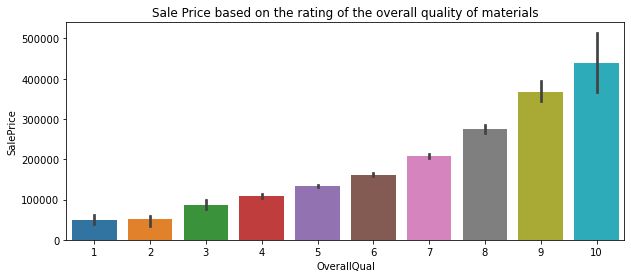

In [26]:
# Analysis between OverallQual and SalePrice

plt.figure(figsize=(10,4))
sns.barplot('OverallQual','SalePrice',data=df)
plt.title('Sale Price based on the rating of the overall quality of materials',fontsize=12)
plt.show()

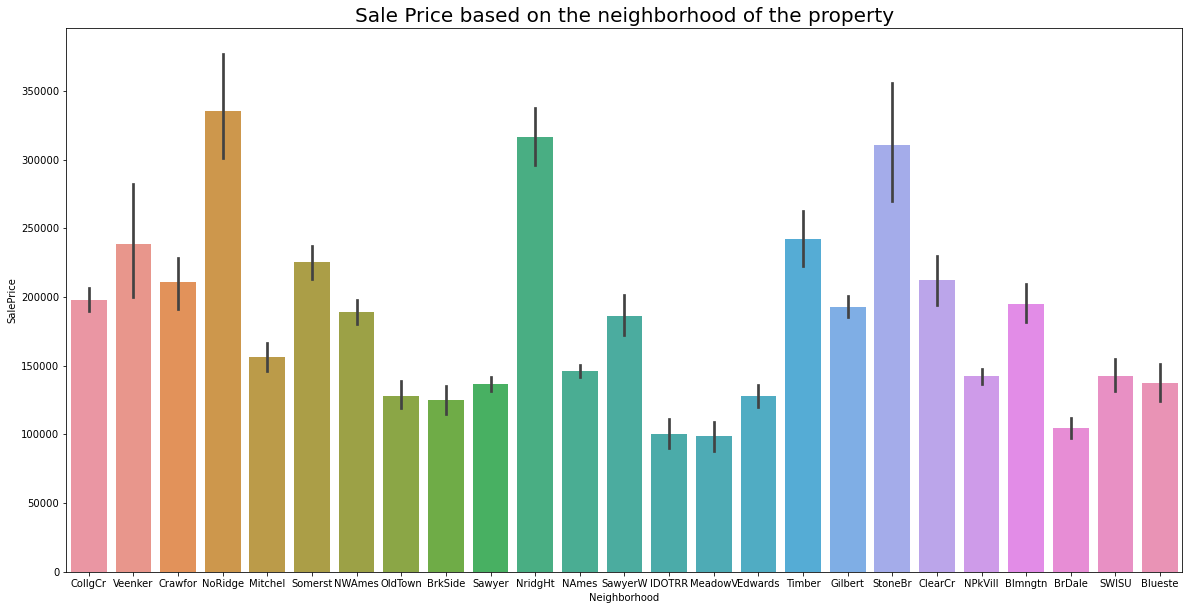

In [27]:
# Analysis between Neighborhood and SalePrice

plt.figure(figsize=(20,10))
sns.barplot('Neighborhood','SalePrice',data=df)
plt.title('Sale Price based on the neighborhood of the property',fontsize=20)
plt.show()

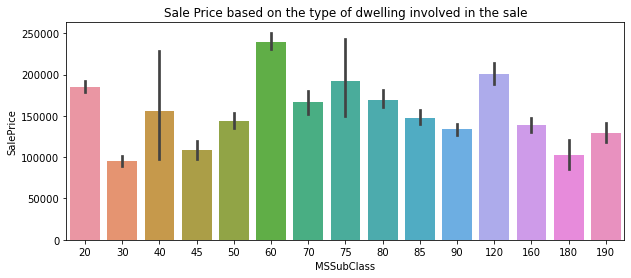

In [28]:
# Analysis between MSSubClass and SalePrice

plt.figure(figsize=(10,4))
sns.barplot('MSSubClass','SalePrice',data=df)
plt.title('Sale Price based on the type of dwelling involved in the sale',fontsize=12)
plt.show()

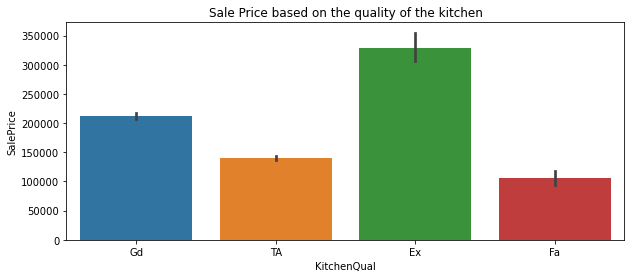

In [29]:
# Analysis between KitchenQual and SalePrice

plt.figure(figsize=(10,4))
sns.barplot('KitchenQual','SalePrice',data=df)
plt.title('Sale Price based on the quality of the kitchen',fontsize=12)
plt.show()

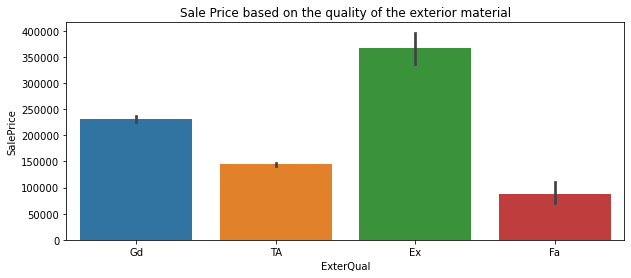

In [30]:
# Analysis between ExterQual and SalePrice

plt.figure(figsize=(10,4))
sns.barplot('ExterQual','SalePrice',data=df)
plt.title('Sale Price based on the quality of the exterior material',fontsize=12)
plt.show()

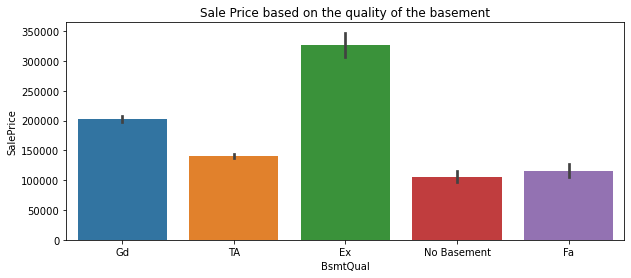

In [31]:
# Analysis between BsmtQual and SalePrice

plt.figure(figsize=(10,4))
sns.barplot('BsmtQual','SalePrice',data=df)
plt.title('Sale Price based on the quality of the basement',fontsize=12)
plt.show()

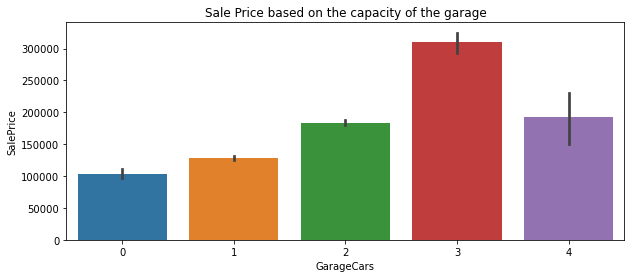

In [32]:
# Analysis between GarageCars and SalePrice

plt.figure(figsize=(10,4))
sns.barplot('GarageCars','SalePrice',data=df)
plt.title('Sale Price based on the capacity of the garage',fontsize=12)
plt.show()

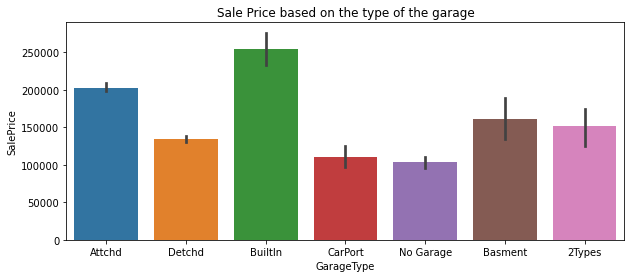

In [33]:
# Analysis between GarageType and SalePrice

plt.figure(figsize=(10,4))
sns.barplot('GarageType','SalePrice',data=df)
plt.title('Sale Price based on the type of the garage',fontsize=12)
plt.show()

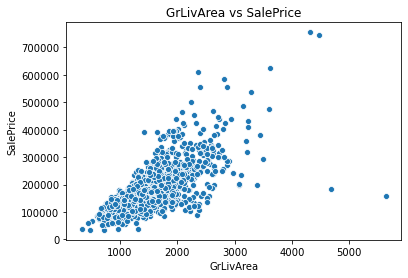

In [34]:
# Analysis of Sale Price with GrLivArea

sns.scatterplot(x='GrLivArea',y='SalePrice' ,data=df)
plt.title('GrLivArea vs SalePrice')
plt.show()

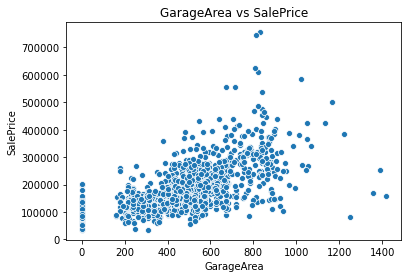

In [35]:
# Analysis of Sale Price with GarageArea

sns.scatterplot(x='GarageArea',y='SalePrice' ,data=df)
plt.title('GarageArea vs SalePrice')
plt.show()

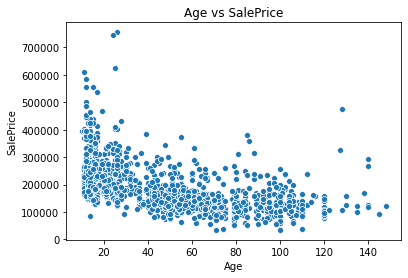

In [36]:
# Analysis of Sale Price with Age

sns.scatterplot(x='Age',y='SalePrice' ,data=df)
plt.title('Age vs SalePrice')
plt.show()

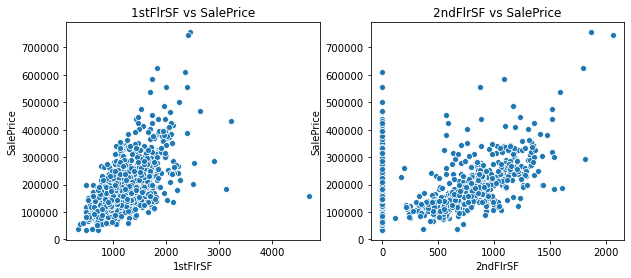

In [37]:
# Analysis of Sale Price with 1stFlrSF and 2ndFlrSF

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=df)
plt.title('1stFlrSF vs SalePrice')

plt.subplot(1,2,2)
sns.scatterplot(x='2ndFlrSF',y='SalePrice',data=df)
plt.title('2ndFlrSF vs SalePrice')

plt.show()

#### Label Treatment for the categorical features

In [38]:
columns = df.dtypes[df.dtypes == 'object'].index.values
for col in columns : 
    print('Labels in ',col,' are ' , df[col].unique(),'\n\n')

Labels in  MSSubClass  are  [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 


Labels in  MSZoning  are  ['RL' 'RM' 'C (all)' 'FV' 'RH'] 


Labels in  LotShape  are  ['Reg' 'IR1' 'IR2' 'IR3'] 


Labels in  LotConfig  are  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 


Labels in  Neighborhood  are  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 


Labels in  Condition1  are  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 


Labels in  BldgType  are  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 


Labels in  HouseStyle  are  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 


Labels in  OverallQual  are  [7 6 8 5 9 4 10 3 1 2] 


Labels in  OverallCond  are  [5 8 6 7 4 2 3 9 1] 


Labels in  RoofStyle  are  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 

In [39]:
# Let us check the labels for 'MSZoning'

df['MSZoning'].value_counts(normalize=True)*100

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

In [40]:
# Labeling those zones having very low counts as 'Others'

ms_zone = df['MSZoning'].value_counts(normalize=True)
low_ms_zone = ms_zone[ms_zone < 0.02].index

df['MSZoning'].replace(low_ms_zone,'Others',inplace=True)
df['MSZoning'].value_counts(normalize=True)*100

RL        78.835616
RM        14.931507
FV         4.452055
Others     1.780822
Name: MSZoning, dtype: float64

In [41]:
# Let us check the labels for 'LotShape'

df['LotShape'].value_counts(normalize=True)*100

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

In [42]:
# Labeling those shapes having very low counts as 'IR2 and Others'

shape = df['LotShape'].value_counts(normalize=True)
low_shape = shape[shape < 0.03].index

df['LotShape'].replace(low_shape,'IR2 and Others',inplace=True)
df['LotShape'].value_counts(normalize=True)*100

Reg               63.356164
IR1               33.150685
IR2 and Others     3.493151
Name: LotShape, dtype: float64

In [43]:
# Let us check the labels for 'LotConfig'

df['LotConfig'].value_counts(normalize=True)*100

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64

In [44]:
# Labeling those shapes having very low counts as 'FR2/FR3'

config = df['LotConfig'].value_counts(normalize=True)
low_config = config[config < 0.04].index

df['LotConfig'].replace(low_config,'FR2/FR3',inplace=True)
df['LotConfig'].value_counts(normalize=True)*100

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2/FR3     3.493151
Name: LotConfig, dtype: float64

In [45]:
# Let us check the labels for 'Neighborhood'

df['Neighborhood'].value_counts(normalize=True)*100

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
SWISU       1.712329
StoneBr     1.712329
Blmngtn     1.164384
MeadowV     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64

In [46]:
# Labeling those neighborhoods having very low counts as 'Others'

nhood = df['Neighborhood'].value_counts(normalize=True)
low_nhood = nhood[nhood < 0.02].index

df['Neighborhood'].replace(low_nhood,'Others',inplace=True)
df['Neighborhood'].value_counts(normalize=True)*100

NAmes      15.410959
CollgCr    10.273973
Others     10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
Name: Neighborhood, dtype: float64

In [47]:
# Let us check the labels for 'Condition1'

df['Condition1'].value_counts(normalize=True)*100

Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64

In [48]:
# Labeling those conditions having very low counts as 'Others'

cond1 = df['Condition1'].value_counts(normalize=True)
low_cond1 = cond1[cond1 < 0.01].index

df['Condition1'].replace(low_cond1,'Others',inplace=True)
df['Condition1'].value_counts(normalize=True)*100

Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
Others     1.780822
PosN       1.301370
Name: Condition1, dtype: float64

In [49]:
# Creating a list of continuous variables to be used for future purposes, barring the column 'SalePrice'

num_vars_ = df.dtypes[df.dtypes != 'object'].index.values
num_vars = np.delete(num_vars_,-2)
num_vars

array(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Age'], dtype=object)

#### Pairplot of all the numeric variables

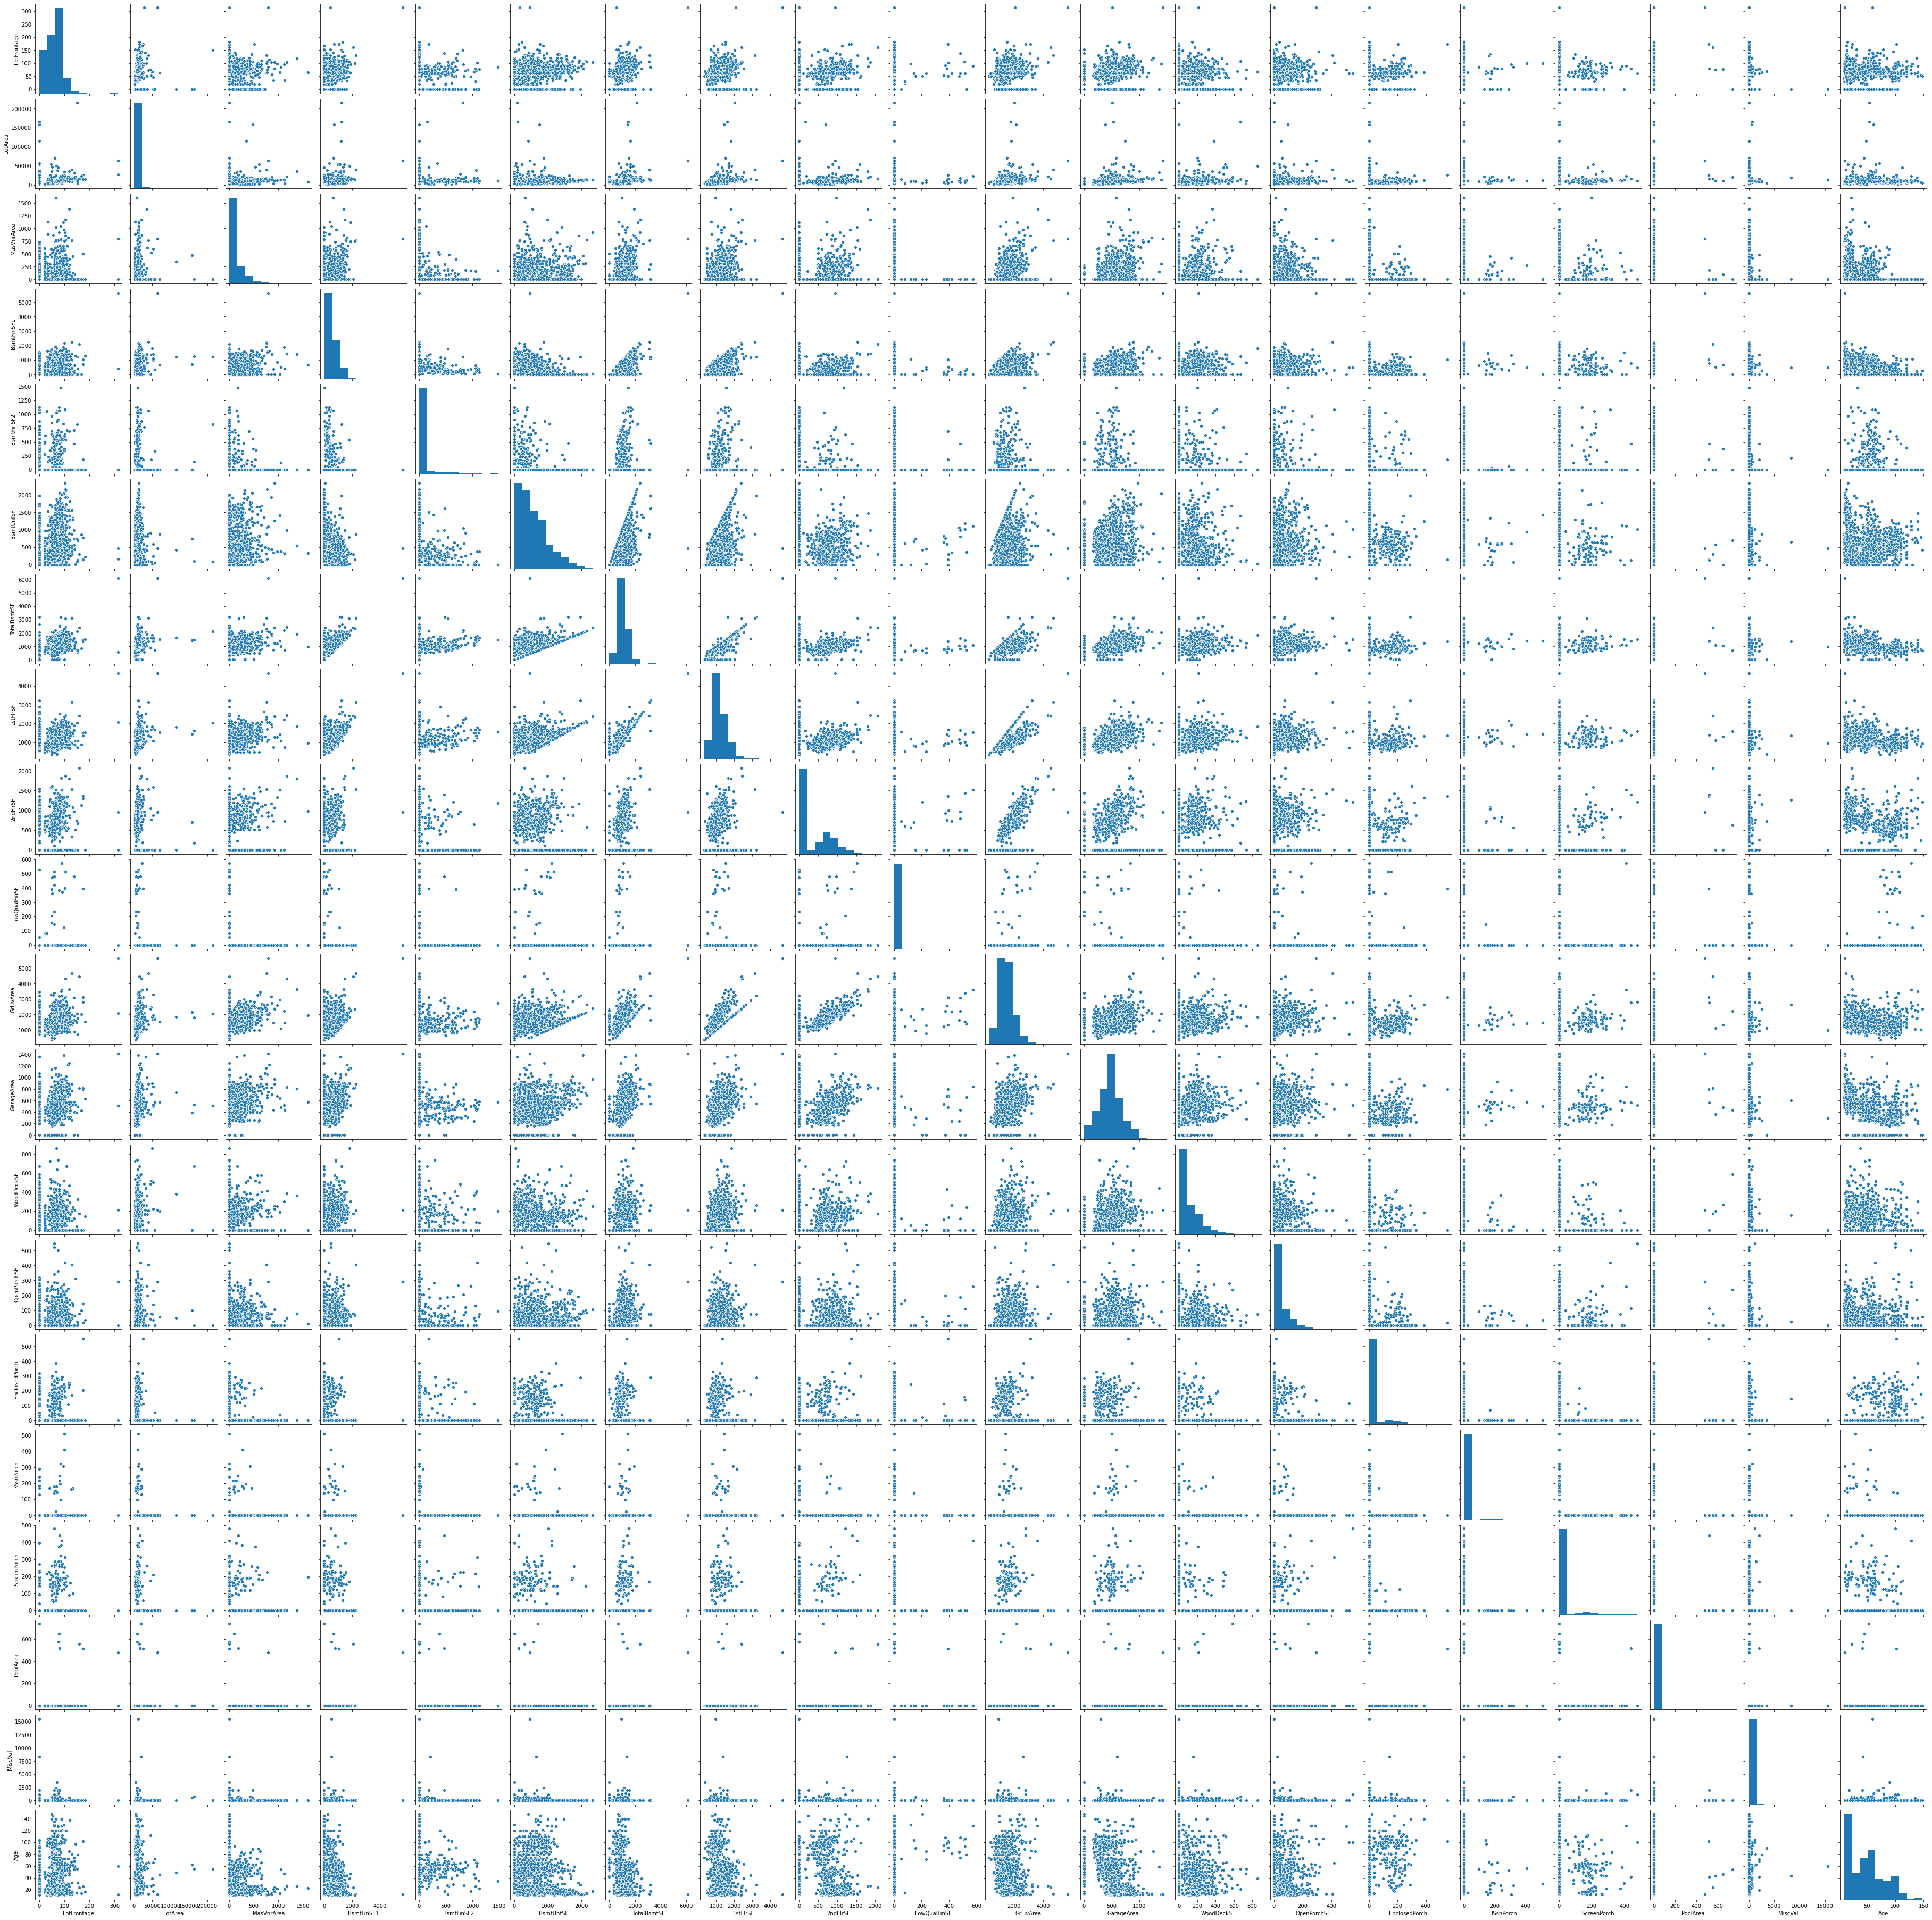

In [50]:
sns.pairplot(df, vars=num_vars)
plt.show()

In [51]:
# Creating a list of categorical variables to be used for future purposes

cat_vars = df.dtypes[df.dtypes == 'object'].index.values
cat_vars

array(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'Fence', 'SaleType',
       'SaleCondition'], dtype=object)

#### Distribution of the dependent variable

<function matplotlib.pyplot.show(*args, **kw)>

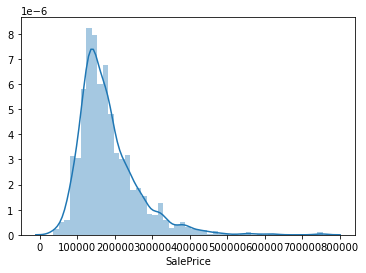

In [52]:
sns.distplot(df['SalePrice'])
plt.show

In [53]:
# Let us check the statistical info for the target variable

df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [54]:
# Let us check the degree of skewness now for the target column

df['SalePrice'].skew()

1.8828757597682129

<function matplotlib.pyplot.show(*args, **kw)>

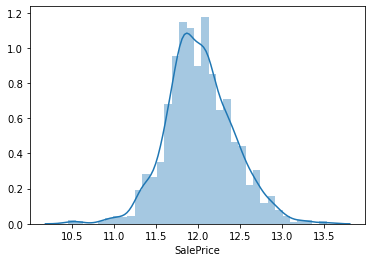

In [55]:
# Let us now try the log transformation

df['SalePrice'] = df['SalePrice'].apply(lambda x : log (x))

sns.distplot(df['SalePrice'])
plt.show

In [56]:
# Let us now check the statistical info for the target variable after the log transformation

df['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [57]:
# Let us now check the degree of skewness now for the target column after the log transformation

df['SalePrice'].skew()

0.12133506220520406

#### Creating dummy variables

In [58]:
# Creating a dataframe with the dummy variables

dummy = pd.get_dummies(df[cat_vars], drop_first = True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2 and Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2/FR3,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [59]:
# Merging the dummy variables' dataframe to the original dataframe

df = pd.concat([df,dummy],axis = 1)

In [60]:
# Dropping those categorical variables, whose corresponding dummies have already been created

df.drop(cat_vars,axis=1,inplace=True)
df.shape

(1460, 232)

#### Splitting the Data into Training and Testing Sets

In [61]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(1021, 232)
(439, 232)


#### Rescaling the Features using MinMax Scaling

In [62]:
scaler = MinMaxScaler()

# Scaling the Train Dataset

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[list(num_vars)].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.184049,0.042162,0.065306,0.079406,0.033980,0.241329,0.173813,0.184401,0.166364,0.011649,0.207562,0.332860,0.108100,0.089934,0.042105,0.007756,0.037559,0.003318,0.003143,0.280281
std,0.109960,0.048221,0.117088,0.082409,0.115907,0.192097,0.075139,0.092106,0.210895,0.093608,0.102200,0.149657,0.145250,0.126569,0.114434,0.063649,0.136582,0.053278,0.037314,0.219718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.137380,0.027937,0.000000,0.000000,0.000000,0.092466,0.129787,0.116667,0.000000,0.000000,0.133935,0.232722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072464
50%,0.191693,0.037555,0.000000,0.069454,0.000000,0.197774,0.162684,0.165278,0.000000,0.000000,0.197540,0.338505,0.000000,0.049713,0.000000,0.000000,0.000000,0.000000,0.000000,0.268116
75%,0.249201,0.046943,0.098750,0.126152,0.000000,0.345034,0.215057,0.243056,0.352542,0.000000,0.256726,0.406206,0.196033,0.133843,0.000000,0.000000,0.000000,0.000000,0.000000,0.405797
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# Scaling the Test Datset

# Fit and transform operations are done on the training data but only transform operation will be done on the test data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[list(num_vars)].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.184219,0.042580,0.062453,0.076739,0.025998,0.246305,0.171326,0.179794,0.171923,0.010651,0.205844,0.335170,0.114320,0.087549,0.034346,0.004282,0.046575,0.006444,0.002022,0.281569
std,0.112687,0.042978,0.102809,0.077027,0.092564,0.182297,0.063409,0.083093,0.212739,0.096367,0.098175,0.153518,0.148636,0.127082,0.101487,0.040640,0.174747,0.078665,0.013016,0.217104
min,0.000000,-0.000828,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008796,0.000000,0.000000,-0.019985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007246
25%,0.129393,0.029293,0.000000,0.000000,0.000000,0.109161,0.133061,0.121759,0.000000,0.000000,0.131245,0.236953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065217
50%,0.207668,0.036947,0.000000,0.063962,0.000000,0.214041,0.160884,0.165741,0.000000,0.000000,0.195619,0.331453,0.000000,0.045889,0.000000,0.000000,0.000000,0.000000,0.000000,0.275362
75%,0.255591,0.047823,0.108750,0.125177,0.000000,0.346318,0.204255,0.224421,0.359080,0.000000,0.260761,0.406206,0.210035,0.125239,0.000000,0.000000,0.000000,0.000000,0.000000,0.405797
max,1.000000,0.736888,0.575625,0.387668,0.764586,0.828339,0.413093,0.498148,0.769492,1.110680,0.609147,0.880113,0.849475,1.045889,0.576087,0.482283,1.283422,1.138889,0.161290,0.978261


In [64]:
# Dividing into X and y sets for model building

y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

#### Using linear regression and selecting features by RFE

In [65]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)  # Running RFE with 30 variables           
rfe = rfe.fit(X_train, y_train)

In [66]:
col = X_train.columns[rfe.support_]
X_train_1 = X_train[col]
X_train_1 = sm.add_constant(X_train_1)
lm = sm.OLS(y_train,X_train_1).fit()

In [67]:
X_train_1 = X_train_1.drop(['const'], axis=1)
lm = sm.OLS(y_train,X_train_1).fit()  #as obtained previously
y_train_pred = lm.predict(X_train_1)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.644709537991276

In [68]:
X_test_1 = X_test[col]
y_test_pred = lm.predict(X_test_1)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.6380366378753888

In [69]:
# Model Coefficients

model_parameters = lm.params
list(zip(col, model_parameters))

[('OverallQual_2', -0.782809183477603),
 ('OverallCond_9', 0.08593973052161309),
 ('Exterior1st_AsphShn', 0.09963757778904414),
 ('Exterior1st_CBlock', -0.06826722992649792),
 ('Exterior2nd_AsphShn', 0.0996375777890508),
 ('Exterior2nd_CBlock', -0.06826722992649392),
 ('BsmtQual_No Basement', -0.1739491788636015),
 ('BsmtFinType1_No Basement', -0.17394917886359507),
 ('BedroomAbvGr_8', 1.3172461971244012),
 ('TotRmsAbvGrd_3', 1.7969915447002327),
 ('TotRmsAbvGrd_4', 1.806256619369334),
 ('TotRmsAbvGrd_5', 1.898762484030768),
 ('TotRmsAbvGrd_6', 1.980040162392518),
 ('TotRmsAbvGrd_7', 2.032060226180844),
 ('TotRmsAbvGrd_8', 2.0899684158379337),
 ('TotRmsAbvGrd_9', 2.146781299233134),
 ('TotRmsAbvGrd_10', 2.2113619935107667),
 ('TotRmsAbvGrd_11', 2.02262479010713),
 ('TotRmsAbvGrd_12', 2.1891842487417152),
 ('TotRmsAbvGrd_14', 1.317246197124399),
 ('Fireplaces_1', 5.364857154629096),
 ('Fireplaces_2', 5.4711075076367806),
 ('Fireplaces_3', 5.469590752405941),
 ('FireplaceQu_No Fireplace'

#### Ridge Regression

In [70]:
# list of parameters (alpha values) to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}

ridge = Ridge()

# cross validation

folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    2.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [71]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015201,0.001721,0.0024,0.000490,0.0001,{'alpha': 0.0001},-0.100142,-0.098040,-0.096229,-0.108791,-0.122364,-0.105113,0.009642,24,-0.073776,-0.074052,-0.073834,-0.063801,-0.060934,-0.069279,0.005717
1,0.014201,0.001939,0.0030,0.000632,0.001,{'alpha': 0.001},-0.100080,-0.097997,-0.096193,-0.108783,-0.122319,-0.105074,0.009644,23,-0.073778,-0.074054,-0.073836,-0.063802,-0.060933,-0.069281,0.005718
2,0.021401,0.003720,0.0034,0.001497,0.01,{'alpha': 0.01},-0.099528,-0.097630,-0.095849,-0.108692,-0.121899,-0.104720,0.009662,22,-0.073800,-0.074074,-0.073852,-0.063819,-0.060948,-0.069299,0.005720
3,0.017201,0.002713,0.0028,0.000400,0.05,{'alpha': 0.05},-0.097834,-0.096760,-0.094610,-0.108196,-0.120348,-0.103550,0.009617,21,-0.073921,-0.074159,-0.073933,-0.063893,-0.061192,-0.069420,0.005680
4,0.015801,0.003060,0.0030,0.000632,0.1,{'alpha': 0.1},-0.096478,-0.096384,-0.093481,-0.107672,-0.118886,-0.102580,0.009489,20,-0.074129,-0.074287,-0.074093,-0.063994,-0.061617,-0.069624,0.005618


In [72]:
# Best value of alpha identified by the grid search cv

model_cv.best_params_

{'alpha': 4.0}

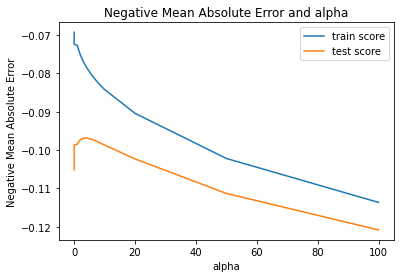

In [73]:
# Plotting mean test and train scores with alpha 

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [74]:
# Selecting the optimum value of alpha as 4.0

ridge = Ridge(alpha = 4.0)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Checking r2 score on the train data

print('r2 score for Train Data')
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

print("\n")

# Checking r2 score on the test data

print('r2 score for Test Data')
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

r2 score for Train Data
0.9220373809762025


r2 score for Test Data
0.8763336000008088


In [75]:
# Ridge Model parameters

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")

# List of features and corresponding coefficients

ridge_f = list(zip(cols, model_parameters))

# Arranging the features as per their coefficients

ridge_coef = {'Feature':list(list(zip(*ridge_f))[0]),'Coeff':list(list(zip(*ridge_f))[1])}
ridge_params = pd.DataFrame(data = ridge_coef)

# To display in descending order of coeffcients

ridge_params.reindex(ridge_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
0,constant,11.860
11,GrLivArea,0.241
8,1stFlrSF,0.199
82,OverallQual_9,0.191
9,2ndFlrSF,0.189
85,OverallCond_3,-0.162
75,OverallQual_2,-0.161
170,FullBath_3,0.154
91,OverallCond_9,0.124
81,OverallQual_8,0.123


#### Explanation of the Ridge Regression Model

* Using ridge regression to regularize our parameters, with 5-fold cross validation, the optimal value of alpha is found to be 4.0 



* From this model, train data r-squared value is found to be around 0.92 and test data r-squared value id found to be around 0.87, thereby, indicating a good stable model



* Some of the most important features in this model, which positively determines the sale price are:-
    * GrLivArea - Higher the ground living area, higher will the sale price
    * 1stFlrSF / 2ndFlrSF - The area of both 1st and 2nd floors contribute to the sale price, the importance of the area of the                             1st floor being a tad higher
    * OverallQual_9 / OverallQual_8 - A 'Very Good' or 'Excellent' rating on the overall material and finish, increases the                                           sale price
    * OverallCond_9 - An 'Excellent' rating on the overall condition would positively impact on the sale price
    * LotArea - The greater the lot size, the higher is the probability of the increase in the sale price
    * Neighborhood_Crawfor - Sale Price is expected to be higher around the Crawford area
    * GarageArea - Higher the area of the garage, higher sale price is expected



* Some of the most important features in this model, which negatively determines the sale price are:-
    * OverallQual_2 / OverallQual_3 - If the overall material and finish rating is either 'Poor' or 'Fair', then the sale price                                       is expceted to be much lower
    * OverallCond_3 - The sale price can be much lower, if the rating on the overall condition is 'Fair'
    * Age - The age of the property is inversely related to the sale price; higher the age of the property, lower will be its               sale price
    * Neighborhood_IDOTRR / Neighborhood_Edwards - Lower sale price is expected around the 'Iowa DOT and Rail Road' area,                                                          followed by Edawards area
    * MSSubClass_30 - A property having class as '1-STORY 1945 & OLDER' is expected to fetch much lower sale price
    * KitchenQual_Fa - A 'Fair' quality rated kitchen may fetch lower sale price
    * ExterQual_Fa - A 'Fair' rated quality of the material on the exterior would fetch lower sale price

#### Lasso Regression

In [76]:
lasso = Lasso()

# Cross Validation

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    3.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.229013,0.042249,0.0026,0.000490,0.0001,{'alpha': 0.0001},-0.091487,-0.094838,-0.089388,-0.103809,-0.113819,-0.098668,0.009037,2,-0.075493,-0.075359,-0.075305,-0.065480,-0.064501,-0.071228,0.005102
1,0.034402,0.006888,0.0026,0.000490,0.001,{'alpha': 0.001},-0.093812,-0.085288,-0.089579,-0.104104,-0.109690,-0.096494,0.009084,1,-0.088072,-0.088495,-0.086721,-0.075933,-0.081508,-0.084146,0.004804
2,0.016601,0.001625,0.0030,0.000632,0.01,{'alpha': 0.01},-0.155298,-0.139846,-0.137021,-0.158763,-0.170303,-0.152246,0.012356,3,-0.148794,-0.150141,-0.148393,-0.143783,-0.145520,-0.147326,0.002325
3,0.014001,0.001265,0.0024,0.000490,0.05,{'alpha': 0.05},-0.214705,-0.198088,-0.205866,-0.218046,-0.215950,-0.210531,0.007481,4,-0.207205,-0.210310,-0.215448,-0.207392,-0.206309,-0.209333,0.003340
4,0.012801,0.000748,0.0028,0.000400,0.1,{'alpha': 0.1},-0.290661,-0.260085,-0.307178,-0.296152,-0.293564,-0.289528,0.015747,5,-0.287019,-0.287522,-0.292134,-0.287806,-0.288594,-0.288615,0.001832


In [78]:
model_cv.best_params_

{'alpha': 0.001}

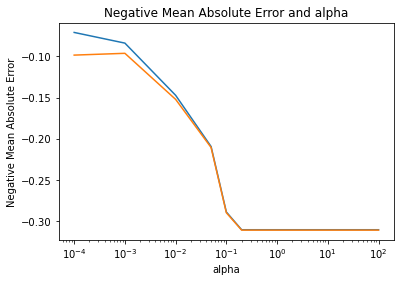

In [79]:
# Plotting mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.xscale('log')
plt.show()

In [80]:
# Selecting the optimum value of alpha as 0.001

lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Checking r2 score on the train data

print('r2 score for Train Data')
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

print("\n")

# Checking r2 score on the train data

print('r2 score for Test Data')
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))


r2 score for Train Data
0.9021352915829381


r2 score for Test Data
0.8738694658952482


In [81]:
# lasso model parameters

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters[1:]]
cols = X_train.columns
cols = cols.insert(0, "constant")

# List of features and corresponding coefficients
lasso_f = list(zip(cols, model_parameters))

# Arranging the features as per their coefficients

lasso_coef = {'Feature':list(list(zip(*lasso_f))[0]),'Coeff':list(list(zip(*lasso_f))[1])}
lasso_params = pd.DataFrame(data = lasso_coef)

# To display in descending order of coeffcients

lasso_params.reindex(lasso_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
10,LowQualFinSF,0.983
81,OverallQual_8,0.232
84,OverallCond_2,-0.190
80,OverallQual_7,0.133
19,MiscVal,-0.131
20,Age,-0.117
11,GrLivArea,0.113
169,FullBath_2,0.109
56,Neighborhood_SawyerW,0.096
43,Neighborhood_CollgCr,0.089


#### Explanation of the Lasso Regression Model

* Using lasso regression to regularize our parameters, with 5-fold cross validation, the optimal value of alpha is found to be 0.001 



* From this model, train data r-squared value is found to be around 0.9 and test data r-squared value id found to be around 0.87, thereby, indicating a good stable model



* Some of the most important features in this model, which positively determines the sale price are:-
    * GrLivArea - Higher the ground living area, higher will the sale price
    * OverallQual_8 / OverallQual_7 - A 'Good' or 'Very Good' rating on the overall material and finish, increases the                                               sale price
    * FullBath_2 - Sale price is expected to be more for full bathrooms above grade 2
    * Neighborhood_SawyerW / Neighborhood_CollgCr/ Neighborhood_NoRidge - Sale Price is expected to be higher around the areas                                                                           of Sawyer West, College Creek and Northridge
    * BsmtQual_TA - A property having basement, with a typical height of 80-89 inch, may have more sale price
    * Fireplaces_1 - A property with a single fireplace is expected to have a higher sale price
    * GarageCars_2 - A property with a garage, having capacity of 2 cars, is expected to have a higher sale price
    * GarageArea - Higher the area of the garage, higher sale price is expected


* Some of the most important features in this model, which negatively determines the sale price are:-
    * OverallCond_2 / OverallCond_3 - The sale price can be much lower, if the rating on the overall condition is either 'Poor'                                       or 'Fair'
    * Age - The age of the property is inversely related to the sale price; higher the age of the property, lower will be its               sale price
    * Neighborhood_Crawfor / Neighborhood_Gilbert - Lower sale price is expected around the areas of Crawford and Gilbert
    * KitchenQual_Ta - An 'Average' quality rated kitchen may fetch lower sale price
    * GarageType_Detchd - If the garage is detached from home, then the sale price is expceted to be lower
    * BsmtExposure_No - If there is no exposure to the basement, then the sale price can be lesser    

#### Subjective Question No. 1

#### Doubling the value of alpha for Ridge Regression

In [82]:
# Changing the value of alpha from 4.0 to 8.0

ridge = Ridge(alpha = 8.0)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Checking r2 score on the train data

print('r2 score for Train Data')
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

print("\n")

# Checking r2 score on the test data

print('r2 score for Test Data')
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

r2 score for Train Data
0.9143676232661541


r2 score for Test Data
0.8755592319201518


In [83]:
# Ridge Model parameters

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")

# List of features and corresponding coefficients

ridge_f = list(zip(cols, model_parameters))

# Arranging the features as per their coefficients

ridge_coef = {'Feature':list(list(zip(*ridge_f))[0]),'Coeff':list(list(zip(*ridge_f))[1])}
ridge_params = pd.DataFrame(data = ridge_coef)

# To display in descending order of coeffcients

ridge_params.reindex(ridge_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
0,constant,11.907
11,GrLivArea,0.181
82,OverallQual_9,0.159
8,1stFlrSF,0.150
9,2ndFlrSF,0.140
85,OverallCond_3,-0.138
170,FullBath_3,0.135
81,OverallQual_8,0.111
75,OverallQual_2,-0.107
21,MSSubClass_30,-0.105


#### Doubling the value of alpha for Lasso Regression

In [84]:
# Changing the value of alpha from 0.001 to 0.002

lasso = Lasso(alpha = 0.002)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Checking r2 score on the train data

print('r2 score for Train Data')
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

print("\n")

# Checking r2 score on the train data

print('r2 score for Test Data')
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

r2 score for Train Data
0.8797523708071792


r2 score for Test Data
0.8521469322966719


In [85]:
# lasso model parameters

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters[1:]]
cols = X_train.columns
cols = cols.insert(0, "constant")

# List of features and corresponding coefficients
lasso_f = list(zip(cols, model_parameters))

# Arranging the features as per their coefficients

lasso_coef = {'Feature':list(list(zip(*lasso_f))[0]),'Coeff':list(list(zip(*lasso_f))[1])}
lasso_params = pd.DataFrame(data = lasso_coef)

# To display in descending order of coeffcients

lasso_params.reindex(lasso_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
10,LowQualFinSF,0.837
81,OverallQual_8,0.190
11,GrLivArea,0.138
84,OverallCond_2,-0.128
80,OverallQual_7,0.119
20,Age,-0.113
19,MiscVal,-0.100
169,FullBath_2,0.094
144,BsmtQual_TA,0.090
212,GarageCars_2,0.083


#### Subjective Question No. 3

In [86]:
lasso = Lasso()

# Cross Validation

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# Dropping the 5 most important predictor variables from the original model

model_cv.fit(X_train.drop(['LowQualFinSF','OverallQual_8','OverallCond_2','OverallQual_7','MiscVal'],axis=1), y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    3.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.225613,4.467302e-02,0.0026,0.00049,0.0001,{'alpha': 0.0001},-0.089564,-0.092668,-0.091696,-0.105472,-0.115597,-0.099000,0.009998,2,-0.076884,-0.076683,-0.076225,-0.066585,-0.065324,-0.072340,0.005233
1,0.032002,5.253943e-03,0.0020,0.00000,0.001,{'alpha': 0.001},-0.094480,-0.085852,-0.093141,-0.105097,-0.111091,-0.097932,0.009003,1,-0.089421,-0.090458,-0.087747,-0.077491,-0.082810,-0.085585,0.004824
2,0.014401,7.999182e-04,0.0024,0.00049,0.01,{'alpha': 0.01},-0.155089,-0.141815,-0.138244,-0.159551,-0.172634,-0.153466,0.012446,3,-0.150275,-0.151418,-0.149518,-0.144844,-0.146469,-0.148505,0.002457
3,0.011601,4.899792e-04,0.0022,0.00040,0.05,{'alpha': 0.05},-0.214705,-0.198088,-0.205866,-0.218046,-0.215950,-0.210531,0.007481,4,-0.207205,-0.210310,-0.215448,-0.207392,-0.206309,-0.209333,0.003340
4,0.011001,1.507891e-07,0.0026,0.00049,0.1,{'alpha': 0.1},-0.290661,-0.260085,-0.307178,-0.296152,-0.293564,-0.289528,0.015747,5,-0.287019,-0.287522,-0.292134,-0.287806,-0.288594,-0.288615,0.001832


In [88]:
model_cv.best_params_

{'alpha': 0.001}

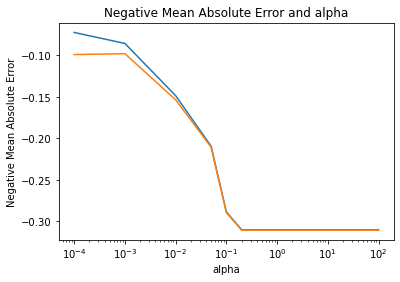

In [89]:
# Plotting mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.xscale('log')
plt.show()

In [90]:
# Selecting the optimum value of alpha as 0.001

lasso = Lasso(alpha = 0.001)
lasso.fit(X_train.drop(['LowQualFinSF','OverallQual_8','OverallCond_2','OverallQual_7','MiscVal'],axis=1), y_train)

y_train_pred = lasso.predict(X_train.drop(['LowQualFinSF','OverallQual_8','OverallCond_2','OverallQual_7','MiscVal'],axis=1))
y_test_pred = lasso.predict(X_test.drop(['LowQualFinSF','OverallQual_8','OverallCond_2','OverallQual_7','MiscVal'],axis=1))

# Checking r2 score on the train data

print('r2 score for Train Data')
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

print("\n")

# Checking r2 score on the train data

print('r2 score for Test Data')
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

r2 score for Train Data
0.8991343812385201


r2 score for Test Data
0.871765282119675


In [91]:
# lasso model parameters

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters[1:]]
cols = X_train.drop(['LowQualFinSF','OverallQual_8','OverallCond_2','OverallQual_7','MiscVal'],axis=1).columns
cols = cols.insert(0, "constant")

# List of features and corresponding coefficients
lasso_f = list(zip(cols, model_parameters))

# Arranging the features as per their coefficients

lasso_coef = {'Feature':list(list(zip(*lasso_f))[0]),'Coeff':list(list(zip(*lasso_f))[1])}
lasso_params = pd.DataFrame(data = lasso_coef)

# To display in descending order of coeffcients

lasso_params.reindex(lasso_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
9,2ndFlrSF,1.007
79,OverallQual_10,-0.190
10,GrLivArea,0.151
17,PoolArea,-0.139
77,OverallQual_6,0.138
18,Age,-0.117
54,Neighborhood_SawyerW,0.113
74,OverallQual_3,-0.104
164,FullBath_2,0.102
73,OverallQual_2,-0.097
